In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

In [2]:
# import necessary libraries
import numpy as np
import time
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sandaludewthilini
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:01<00:00, 173MB/s]


In [4]:
BATCH_SIZE =32
IMAGE_SIZE = (128, 128)

In [5]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [12]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                          batch_size = BATCH_SIZE,
                                                          image_size = IMAGE_SIZE,
                                                         subset = 'training',
                                                         validation_split=0.1,
                                                         seed=42)
validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                          batch_size = BATCH_SIZE,
                                                          image_size = IMAGE_SIZE,
                                                         )

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [13]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

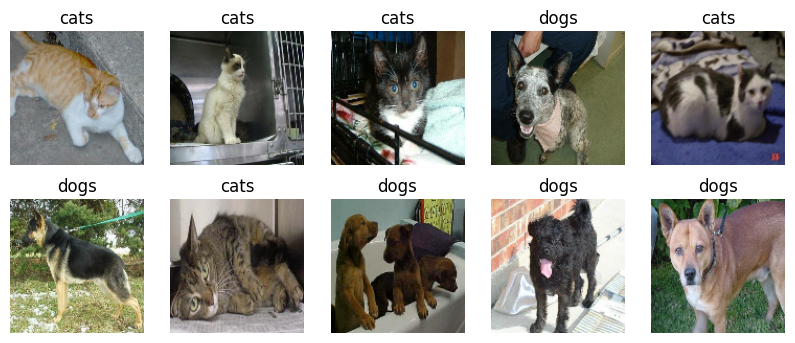

In [16]:
#plot data sample
plt.figure(figsize=(10, 4))
for image, label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2, 5, i +1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [17]:
for image, label in train_data. take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[ 38.55078     21.550781    31.550781  ]
   [ 39.90625     22.90625     32.90625   ]
   [ 36.6875      19.6875      29.6875    ]
   ...
   [  0.           1.           0.        ]
   [  0.           0.           0.        ]
   [  0.           0.           0.        ]]

  [[ 38.44922     21.449219    31.449219  ]
   [ 37.328125    20.328125    30.328125  ]
   [ 35.32422     18.324219    28.324219  ]
   ...
   [  0.           0.           0.        ]
   [  0.           0.32421875   0.        ]
   [  0.           0.           0.        ]]

  [[ 39.987534    22.987534    32.987534  ]
   [ 38.27568     21.27568     31.27568   ]
   [ 38.039062    21.039062    31.039062  ]
   ...
   [  1.           0.           0.        ]
   [  0.           1.           0.        ]
   [  0.           0.           0.        ]]

  ...

  [[184.55377    171.84134    185.32405   ]
   [191.96484    179.41348    193.68916   ]
   [197.16423    183.4764     196.32031   ]
   ...
   [ 12.           1.   

#Data preprocessing part

In [18]:
#normalization
train_data = train_data.map(lambda x, y: (x/255, y))
validation_data = validation_data.map(lambda x, y: (x/255, y))
test_data = test_data.map(lambda x, y: (x/255, y))

In [19]:
for image, label in train_data. take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.33361313 0.3732118  0.46510825]
   [0.28804237 0.20327064 0.37857547]
   [0.3038884  0.16342941 0.37726966]
   ...
   [0.5541973  0.39748776 0.3320772 ]
   [0.54515934 0.3999081  0.337163  ]
   [0.53333336 0.40392157 0.3372549 ]]

  [[0.35903955 0.42570156 0.45473346]
   [0.33983907 0.2941083  0.4078691 ]
   [0.2924788  0.16569453 0.35958216]
   ...
   [0.5516391  0.4040288  0.33469668]
   [0.55417734 0.41420168 0.34738782]
   [0.5462929  0.4168811  0.34748775]]

  [[0.37059075 0.44638732 0.4476997 ]
   [0.36649793 0.38684884 0.43119627]
   [0.31189275 0.24541698 0.38218993]
   ...
   [0.551011   0.40784314 0.33628982]
   [0.5431222  0.41754007 0.3352484 ]
   [0.54509807 0.41960785 0.33532476]]

  ...

  [[0.8127298  0.7617494  0.73822   ]
   [0.8147212  0.7676624  0.72054225]
   [0.8104905  0.76343167 0.7085297 ]
   ...
   [0.8097607  0.7823097  0.75093716]
   [0.8090001  0.78933096 0.76578647]
   [0.79248106 0.7728732  0.75520056]]

  [[0.80693775 0.75595737 0.732427

In [20]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#Model Building part

In [21]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,325,825 (12.69 MB)

 Trainable params: 3,325,569 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [23]:
#compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])



In [24]:
#Train the model
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.5677 - loss: 0.6950 - val_accuracy: 0.6275 - val_loss: 0.6655
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.6308 - loss: 0.6443 - val_accuracy: 0.6288 - val_loss: 0.6351
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.6524 - loss: 0.6246 - val_accuracy: 0.6350 - val_loss: 0.6205
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.6652 - loss: 0.6101 - val_accuracy: 0.7262 - val_loss: 0.5790
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.6902 - loss: 0.5804 - val_accuracy: 0.7387 - val_loss: 0.5402
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.6955 - loss: 0.5683 - val_accuracy: 0.7550 - val_loss: 0.5253
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7257 - loss: 0.5398 - val_accuracy: 0.6612 - val_loss: 0.6565
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.7279 - loss: 0.5297 - val_a

In [25]:
history.history


{'accuracy': [0.5994444489479065,
  0.6369444727897644,
  0.6538888812065125,
  0.6776388883590698,
  0.6911110877990723,
  0.706944465637207,
  0.726527750492096,
  0.7313888669013977,
  0.7351388931274414,
  0.7511110901832581,
  0.7598611116409302,
  0.7648611068725586,
  0.7763888835906982,
  0.7793055772781372,
  0.7854166626930237,
  0.7925000190734863,
  0.7998611330986023,
  0.8015277981758118,
  0.8118055462837219,
  0.809166669845581],
 'loss': [0.6666234731674194,
  0.6350889801979065,
  0.6199565529823303,
  0.5962914824485779,
  0.5793938040733337,
  0.5600834488868713,
  0.5396173596382141,
  0.5247617363929749,
  0.5200620293617249,
  0.5047470331192017,
  0.4999709725379944,
  0.4854884743690491,
  0.4644029438495636,
  0.4601869285106659,
  0.45117196440696716,
  0.4382449686527252,
  0.4235474169254303,
  0.4276275038719177,
  0.41205376386642456,
  0.4086367189884186],
 'val_accuracy': [0.6274999976158142,
  0.6287500262260437,
  0.6349999904632568,
  0.7262499928474

#Performance Analysis

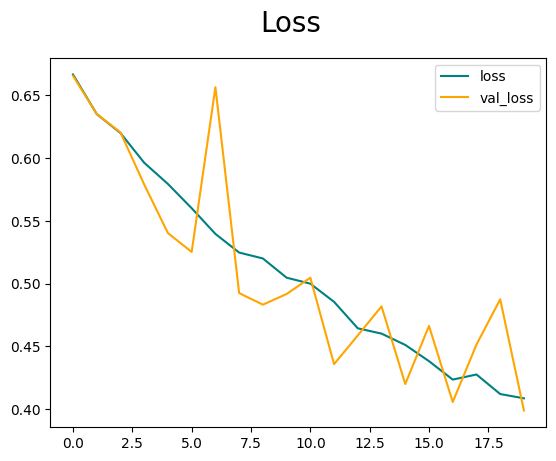

In [26]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

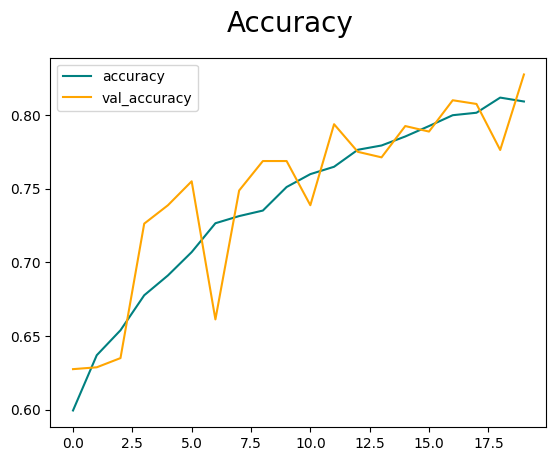

In [27]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

#Model Evaluation

In [28]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [29]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

In [30]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8291925191879272>

In [31]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8009999990463257>

In [32]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8180000185966492>

In [33]:
!pip install opencv.python

In [34]:
import cv2

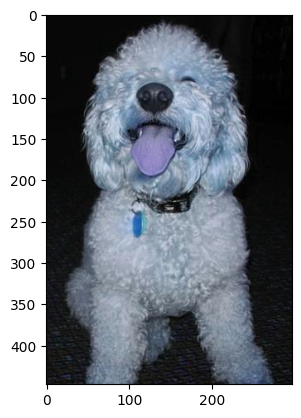

In [43]:
image = cv2.imread("/content/cats-and-dogs-for-classification/cats_dogs/test/dogs/dog.4003.jpg")
plt.imshow(image)
plt.show()

In [44]:
resized_image = tf.image.resize(image, IMAGE_SIZE) # Changed 'img' to 'image'
scaled_image = resized_image/255

In [45]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [46]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [47]:
yhat

array([[0.9958222]], dtype=float32)

In [48]:
class_names


['cats', 'dogs']

In [49]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

dogs
